# Sotachstic Gradient Descent (SGD)
Linear Classifer and Regressor
source: https://scikit-learn.org/stable/modules/sgd.html

In [1]:
from sklearn.linear_model import SGDClassifier

In [2]:
X = [[0,1],[1,1]]
y = [0,1]

In [3]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X,y)

/home/rahkooy/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [4]:
clf.predict([[2,2]])

array([1])

## Some Model Parameters:

In [5]:
clf.coef_

array([[29.73240833, -9.91080278]])

In [6]:
clf.intercept_

array([-9.97020866])

## Plot SGC on iris Dataset
source:https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [9]:
iris = datasets.load_iris()

#consider only two first features of iris:
X = iris.data[:, :2]
y = iris.target

In [36]:
#shuffle 
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]
colors = "bry"

In [31]:
# standardize
mean = X.mean(axis =0)
std = X.std(axis =0)
X = (X - mean)/ std

(-2.8700241338470187, 3.492019202124429, -3.43394714190809, 4.090775248299429)

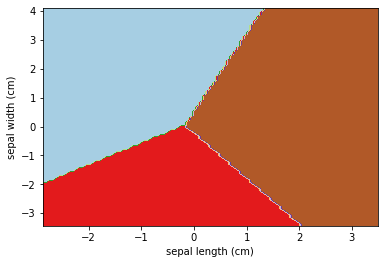

In [32]:
clf = SGDClassifier(alpha=0.01, max_iter=100).fit(X,y)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

(-2.0881263006455915,
 2.7101213689230015,
 -2.7101832614184658,
 3.3670113678098046)

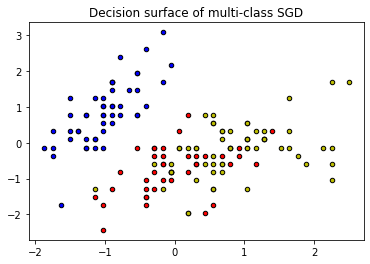

In [33]:
# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


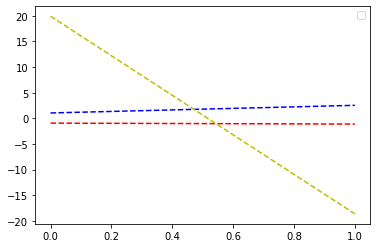

In [34]:
# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()
